In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
data = pd.read_csv('/content/weight-height (1).csv')

In [ ]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
data['Gender'] = [1 if g=="Male" else 0 for g in data['Gender']]
data.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [ ]:
data.shape

(10000, 3)

In [ ]:
data.Gender.value_counts()

,count
Gender,
Male,5000
Female,5000


In [ ]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [ ]:
data.isna().sum()

,0
Gender,0
Height,0
Weight,0


In [ ]:
data.duplicated().sum()

np.int64(0)

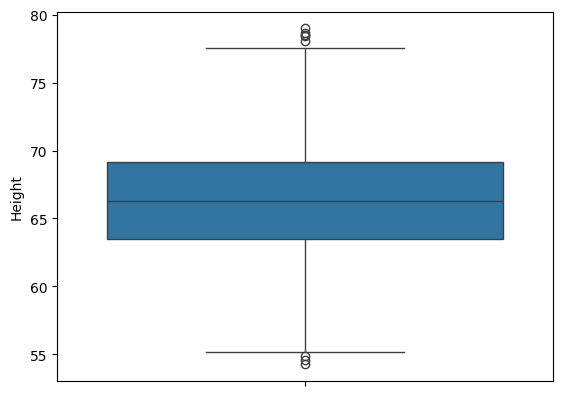

In [ ]:
sns.boxplot(data['Height'])
plt.show()

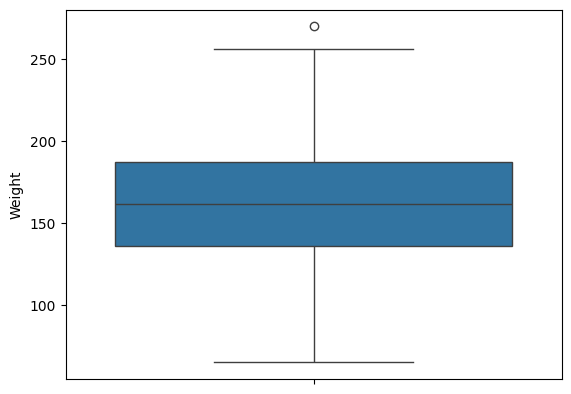

In [ ]:
sns.boxplot(data['Weight'])
plt.show()

In [ ]:
data.Height.corr(data.Weight)

np.float64(0.924756298737806)

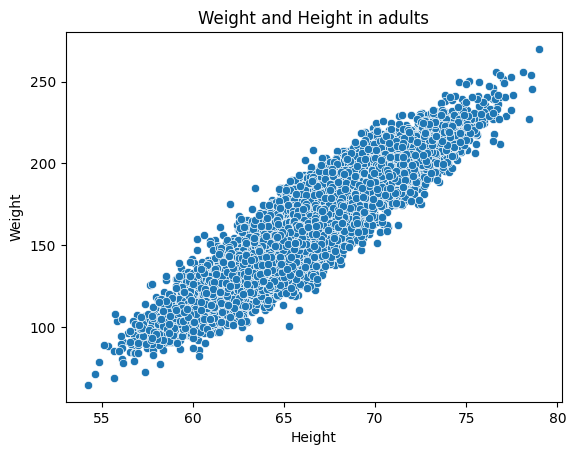

In [ ]:
sns.scatterplot(x=data['Height'], y=data['Weight']) # Remove the 'title' argument from here
plt.title('Weight and Height in adults') # Set the title using plt.title()
plt.show()

In [ ]:
def line(x,m=0,b=0):
    y=m*x+b
    return y

In [ ]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [ ]:
X = data[['Height']].values
y = data[['Weight']].values

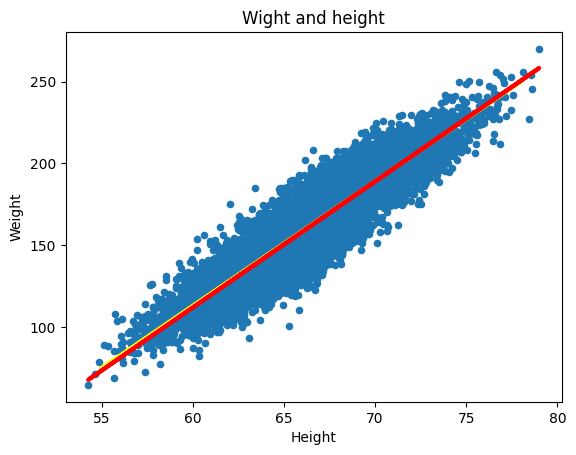

In [ ]:
y_pred = line(X, 7.7,-350)

data.plot(kind='scatter', x='Height', y='Weight', title='Wight and height')
plt.plot([55,78], [75,250], color="yellow", linewidth=3)

plt.plot(X, y_pred, color='red', linewidth=3)
plt.show()

In [ ]:
mean_squared_error(y, y_pred)

np.float64(149.46612805337182)

#Simple Linear Regression Model
    -1 input >>>> Height
    - Target >>>> Weight

In [ ]:
X = data[['Height']]
y = data.Weight

In [ ]:
X.ndim, y.ndim

(2, 1)

#Step 3: Split data Training Data and Test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=.40)

In [ ]:
y_train.shape

(6000,)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
#supervised leraning data+ans
lr.fit(X_train,y_train)
# lr.fit(X,Y)

LinearRegression()

In [ ]:
lr.coef_

array([7.71316805])

In [ ]:
lr.intercept_

np.float64(-350.4837037042746)

### this is our predicted line accirding to modle parameters
y = 7.71399044     X -350.5238702957191

#Prediction on training data

In [ ]:
y_pred_train = lr.predict(X_train)

In [ ]:
pd.DataFrame({'Actual':y_train, 'Predicted':y_pred_train})

,Actual,Predicted
7809,141.875465,146.971810
5279,100.743008,104.494011
3279,186.270773,156.135412
8984,124.460003,134.944897
8466,130.012336,129.418808
...,...,...
9225,97.263881,115.555590
4859,174.156893,164.221820
3264,162.475957,169.901267
9845,136.783022,128.715991


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
r2_score(y_train, y_pred_train)

0.8570169896550387

In [ ]:
mean_absolute_error(y_train, y_pred_train)

9.67884817077144

In [ ]:
mean_squared_error(y_train, y_pred_train)

147.61319296255323

#prediction on test data

In [ ]:
y_pred_test = lr.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_test)

0.8523953836639468

In [ ]:
def predict1_weight(height):
    return lr.predict(height) * 0.453592

In [ ]:
height = float(input("Please enter you height in feet to get your weight"))
print(f"Your predicted weight is {predict1_weight([[height*12]])} kgs")

Please enter you height in feet to get your weight6.15391808333
Your predicted weight is [99.38688246] kgs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
height = float(input("Please enter you height to get your weight"))
lr.predict([[height]])

Please enter you height to get your weight70


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([189.47294304])

In [ ]:
# data['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)

#Now i have a 2input columns

In [ ]:
X = data[['Gender', 'Height']]
X

,Gender,Height
0,0,73.847017
1,0,68.781904
2,0,74.110105
3,0,71.730978
4,0,69.881796
...,...,...
9995,0,66.172652
9996,0,67.067155
9997,0,63.867992
9998,0,69.034243


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=.40)

In [ ]:
mlr = LinearRegression()

In [ ]:
mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict_train = mlr.predict(X_train)

In [ ]:
r2_score(y_train, y_predict_train)

In [ ]:
# Generate dummy data
np.random.seed(42)
cgpa = np.round(np.random.uniform(5.0, 10.0, 200), 2)  # CGPA between 5.0 and 10.0

# Generate dummy package data based on CGPA with some randomness
package = np.round(cgpa * np.random.uniform(0.8, 1.5, 200) * 2, 2)  # Just a rough simulation

# Create DataFrame
df = pd.DataFrame({
    "cgpa": cgpa,
    "package": package
})

In [ ]:
df.head()

,cgpa,package
0,6.87,17.17
1,9.75,16.75
2,8.66,15.82
3,7.99,22.84
4,5.78,14.16


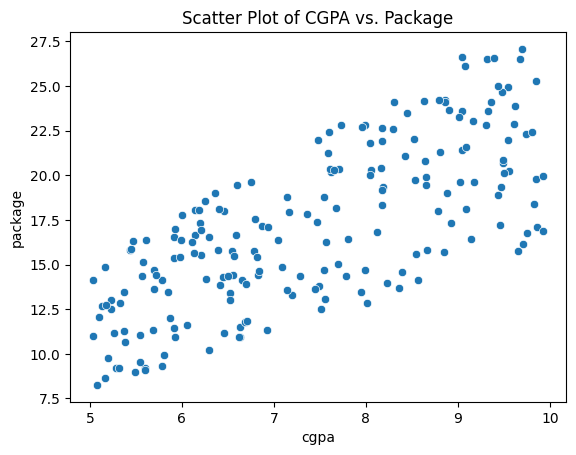

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='cgpa', y='package', data=df, color='red')
# plt.title('Scatter Plot of CGPA vs. Package')
# plt.xlabel('CGPA')
# plt.ylabel('Package (in Lakhs)')
# plt.grid(True)
# plt.show()

sns.scatterplot(x=df['cgpa'], y=df['package']) # Remove the 'title' argument from here
plt.title('Scatter Plot of CGPA vs. Package') # Set the title using plt.title()
plt.show()

In [ ]:
#now seprate the input and output that use in LR
# X = df[['cgpa']]
# Y = df['package']

X = df.iloc[:,0:1]
Y = df.iloc[:,-1]